In [2]:
import pandas as pd
import numpy as np
import re
import string
import time
from datetime import datetime
from datetime import date
import os

#Plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

# Save model
import pickle
import joblib

In [3]:
# fileLocation = 'C:\\Users\\VictorY\\Desktop\\TestData\\stage3FinalProcessedDF_Nov-17-2019.csv'
moviesDataFileLocation = 'C:\\Yuva\\ITU\\4th Sem\\Thesis\\Data\\Final_Data_Movies_Directors.csv'
saveFileToPath = "C:\\Yuva\\ITU\\4th Sem\\Thesis\\Data\\"

movies_data = pd.read_csv(moviesDataFileLocation)

In [4]:
movies_data

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,rating_value,rating_count,date_published,release_date,movie_year,birthYear,primaryProfession,knownForTitles,Gender
0,nm0005690,William K.L. Dickson,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,5.8,1255,1894-03-10,10 March 1894 (USA) See more »,1894,1860,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male
1,nm0721526,Émile Reynaud,tt0000002,A bohóc és kutyái (1892) - IMDb,0,0,6.5,148,1892-10-28,28 October 1892 (France) See more »,1892,1844,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male
2,nm0721526,Émile Reynaud,tt0000003,Szegény Pierrot (1892) - IMDb,12,5,6.6,819,1892-10-28,28 October 1892 (France) See more »,1892,1844,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male
3,nm0721526,Émile Reynaud,tt0000004,Egy jó pohár sör (1892) - IMDb,1,0,6.6,90,1892-10-28,28 October 1892 (France) See more »,1892,1844,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male
4,nm0005690,William K.L. Dickson,tt0000005,A patkolókovács (1893) - IMDb,18,3,6.2,1499,1893-05-09,9 May 1893 (USA) See more »,1893,1860,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325370,nm0267512,Valerie Faris,tt6720730,Red Hot Chili Peppers: Californication (Video ...,0,0,7.3,10,2000-06-05,5 June 2000 (USA) See more »,2000,1958,"director,producer,writer","tt4648296,tt0449059,tt1839492,tt4622512",Female
325371,nm1982597,Rihanna,tt6723088,Rihanna: Disturbia (Video 2008) - IMDb,0,0,6.6,14,2008-07-22,22 July 2008 (USA) See more »,2008,1988,"soundtrack,actress,composer","tt1440129,tt2239822,tt1245492,tt2224026",Female
325372,nm0000005,Ingmar Bergman,tt6725014,Scenes from a Marriage: Theatrical Version (19...,0,0,7.8,30,1974-09-21,21 September 1974 (USA) See more »,1974,1918,"writer,director,actor","tt0083922,tt0069467,tt0050986,tt0050976",Male
325373,nm8895714,Grant Bullert,tt6732168,In the Dark (2016) - IMDb,0,0,5.0,6,None,None,2016,1996,"writer,cinematographer,producer","tt7440708,tt6732168,tt8400134,tt7924700",Male


In [5]:
movies_data.describe()

,review_count_user,review_count_critic,rating_value,rating_count,movie_year,birthYear
count,325375.000000,325375.000000,325375.000000,3.253750e+05,325375.000000,325375.000000
mean,8.148693,4.953085,6.836027,1.865055e+03,1985.417269,1941.103139
std,61.496919,25.882580,1.302666,2.163975e+04,25.184835,27.455184
min,0.000000,0.000000,1.000000,5.000000e+00,1887.000000,6.000000
25%,0.000000,0.000000,6.100000,1.100000e+01,1968.000000,1922.000000
50%,0.000000,0.000000,7.000000,3.000000e+01,1992.000000,1944.000000
75%,2.000000,1.000000,7.800000,1.270000e+02,2007.000000,1963.000000
max,5075.000000,815.000000,10.000000,1.741951e+06,2017.000000,2004.000000


In [6]:
# Quartile cut into 4 different buckets

bin_quartiles = ['poor','average','good','excellent']
cutIntoQuartiles = pd.qcut(movies_data['rating_value'].to_list(), q=4,labels=bin_quartiles)

# Print the quartile range for visuals
print(cutIntoQuartiles.categories)

# Add the data to the dataframe
movies_data['calc_score'] = cutIntoQuartiles

Index(['poor', 'average', 'good', 'excellent'], dtype='object')


In [7]:
movies_data.describe()

,review_count_user,review_count_critic,rating_value,rating_count,movie_year,birthYear
count,325375.000000,325375.000000,325375.000000,3.253750e+05,325375.000000,325375.000000
mean,8.148693,4.953085,6.836027,1.865055e+03,1985.417269,1941.103139
std,61.496919,25.882580,1.302666,2.163975e+04,25.184835,27.455184
min,0.000000,0.000000,1.000000,5.000000e+00,1887.000000,6.000000
25%,0.000000,0.000000,6.100000,1.100000e+01,1968.000000,1922.000000
50%,0.000000,0.000000,7.000000,3.000000e+01,1992.000000,1944.000000
75%,2.000000,1.000000,7.800000,1.270000e+02,2007.000000,1963.000000
max,5075.000000,815.000000,10.000000,1.741951e+06,2017.000000,2004.000000


In [8]:
movies_data['calc_score'].value_counts()

good         85868
poor         85353
average      82925
excellent    71229
Name: calc_score, dtype: int64

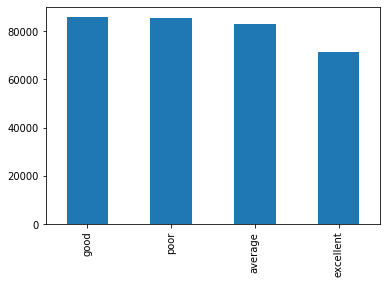

In [9]:
movies_data['calc_score'].value_counts().plot.bar()

In [10]:
movies_data.columns

Index(['director_ids', 'director_names', 'movie_id', 'title',
       'review_count_user', 'review_count_critic', 'rating_value',
       'rating_count', 'date_published', 'release_date', 'movie_year',
       'birthYear', 'primaryProfession', 'knownForTitles', 'Gender',
       'calc_score'],
      dtype='object')

In [11]:
req_columns = ['review_count_user', 'review_count_critic', 
               'rating_count','movie_year','birthYear','Gender','calc_score']
# 'rating_value',

In [12]:
movies_data = movies_data[req_columns]

In [13]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325375 entries, 0 to 325374
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   review_count_user    325375 non-null  int64   
 1   review_count_critic  325375 non-null  int64   
 2   rating_count         325375 non-null  int64   
 3   movie_year           325375 non-null  int64   
 4   birthYear            325375 non-null  int64   
 5   Gender               325375 non-null  object  
 6   calc_score           325375 non-null  category
dtypes: category(1), int64(5), object(1)
memory usage: 15.2+ MB


In [14]:
movies_data.calc_score = movies_data.calc_score.astype(object)

C:\Users\yuvar\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325375 entries, 0 to 325374
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   review_count_user    325375 non-null  int64 
 1   review_count_critic  325375 non-null  int64 
 2   rating_count         325375 non-null  int64 
 3   movie_year           325375 non-null  int64 
 4   birthYear            325375 non-null  int64 
 5   Gender               325375 non-null  object
 6   calc_score           325375 non-null  object
dtypes: int64(5), object(2)
memory usage: 17.4+ MB


In [16]:
# Generic function to equally split the dataframe with respect to the column Name, in our case the Gender column.

def equal_split_on_columnName(nSampleEach, df,columnName='Gender'):
    df1 = pd.DataFrame()
    for i in df[columnName].value_counts().index:
        df1 = df1.append(df[(df[columnName]==i)].sample(n=nSampleEach,replace = False))        
    return df1.reset_index(drop=True)

In [17]:
copy = movies_data.copy()

In [18]:
movies_data = copy.sample(n = 1000 , random_state = 42)
# movies_data = equal_split_on_columnName(5000,movies_data)

In [19]:
# one hot encoding of Gender
movies_data = pd.concat([movies_data, pd.get_dummies(movies_data.Gender,prefix='Gender')],axis=1)
movies_data.drop(['Gender'],axis=1, inplace=True)
movies_data

,review_count_user,review_count_critic,rating_count,movie_year,birthYear,calc_score,Gender_Female,Gender_Male
313389,0,0,47,2015,1981,average,0,1
180746,2,1,71,1966,1909,good,0,1
268360,0,0,12,2010,1973,average,1,0
89122,0,0,6,1985,1904,average,0,1
34838,25,2,541,1964,1920,average,1,0
...,...,...,...,...,...,...,...,...
275747,3,0,40,2011,1975,average,0,1
96207,0,0,6,1978,1931,average,0,1
150808,0,0,19,2002,1964,excellent,0,1
102822,2,0,87,1955,1906,good,0,1


# Run SVM 

In [20]:
start = time.time()
print("Started Reading files at :" + str(datetime.utcfromtimestamp(start).strftime('%Y-%m-%d %H:%M:%S')))

Started Reading files at :2020-04-10 08:24:09


In [21]:
predictingFeature  =  ['calc_score']
featuresSelected = movies_data.columns.to_list()
featuresSelected.remove('calc_score')

In [22]:
# divide the data into attributes and labels
X = movies_data[featuresSelected]
y = movies_data[predictingFeature]

In [23]:
# Divide the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [24]:
# Training the model
svclassifier = SVC(kernel='linear')
# svclassifier = SVC(kernel='poly', degree=4)
# svclassifier = SVC(kernel='rbf')
# svclassifier = SVC(kernel='sigmoid')

In [25]:
# Fit the model
svclassifier.fit(X_train, y_train)

C:\Users\yuvar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
train_score_SVC = svclassifier.score(X_train, y_train)
train_score_SVC

0.34375

In [27]:
test_score_SVC = svclassifier.score(X_test, y_test)
test_score_SVC

0.28

In [28]:
# Prediction based on the model trained
y_pred = svclassifier.predict(X_test)
# tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [29]:
confusion_matrix(y_test,y_pred)

array([[22, 30,  5,  0],
       [ 6, 27,  6,  0],
       [23, 26,  6,  0],
       [19, 21,  8,  1]], dtype=int64)

In [30]:
# Classification Report
print("\nClassification Report\n")
print(classification_report(y_test, y_pred))


Classification Report

              precision    recall  f1-score   support

     average       0.31      1.00      0.47        62
   excellent       0.00      0.00      0.00        37
        good       0.00      0.00      0.00        57
        poor       0.00      0.00      0.00        44

    accuracy                           0.31       200
   macro avg       0.08      0.25      0.12       200
weighted avg       0.10      0.31      0.15       200



C:\Users\yuvar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.0

In [ ]:
def print_feature_importances(coef, names, top=-1):
    whole = []
    imp = coef
    imp,names = zip(*sorted(list(zip(imp, names)),reverse=True))
    for i in range(len(names)):
        string = "{} :: {}".format(str(names[i]),str(round(imp[i],3)))
        whole.append(string)
    return whole

In [ ]:
# Feature importance based on contribution to the classifier model
print("\nAbsolute contributions\n")
absoluteListOrder = print_feature_importances(abs(svclassifier.coef_[0]), featuresSelected)
for j in absoluteListOrder:
    print(j)

In [ ]:
# Stop timer
end = time.time()

In [ ]:
print("\nStopped Reading files at :" + str(datetime.utcfromtimestamp(end).strftime('%Y-%m-%d %H:%M:%S')))
total_time = str(round((end - start)/60,2))
print("Total time taken in minutes: " + str((end - start)/60))